# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import sys


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp

LINEFOLDER   = '../Data/Lines/'
SURVEYFOLDER = '../Data/Surveys/'
df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']


line   = {}
twiss  = {}

# Importing twiss
for seq in ['lhcb1','lhcb4']:
    _beam = seq[-2:]
    
    # Importing Line
    line[_beam] = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')
    
    # Importing twiss and tracker
    if _beam == 'b1':
        tracker = xt.Tracker(line=line[_beam])
        xtwiss  = tracker.twiss()
    else:
        xtwiss  = xt.Tracker(line=line[_beam]).twiss()
    
    twiss[_beam]= pd.DataFrame(xtwiss,columns = df_columns)
    twiss[_beam].set_index('name',inplace=True)


# Creating twiss b2 from b4
#==========================================
twiss['b2'] = xPlus.twiss_b2_from_b4(twiss['b4'])
#==========================================

# Clearing xsuite ouput
clear_output(wait=False)






In [2]:
madtwiss = {}
madtwiss['b1'] = pd.read_pickle(f'../Data/Checks/b1_with_bb_V2/twiss_opticsfile32_lhcb1.pkl')
madtwiss['b2'] = pd.read_pickle(f'../Data/Checks/b1_with_bb_V2/twiss_opticsfile32_lhcb2.pkl')

madtwiss['b1'].index = pd.Series(madtwiss['b1'].index).apply(lambda idx: idx.split('[')[0])
madtwiss['b2'].index = pd.Series(madtwiss['b2'].index).apply(lambda idx: idx.split('[')[0])

madtwiss['b1'].drop(columns=['name'],inplace=True)
madtwiss['b2'].drop(columns=['name'],inplace=True)

madtwiss['b1'].index.name='name'
madtwiss['b2'].index.name='name'

In [3]:
# Filtering twiss
for ridof in ['drift','..']:
    for beam in ['b1','b2']:
        twiss[beam]    =    twiss[beam][np.invert(twiss[beam].index.str.contains(ridof,regex=False))]
        madtwiss[beam] = madtwiss[beam][np.invert(madtwiss[beam].index.str.contains(ridof,regex=False))]

for beam in ['b2']:
        ridof = 'bbcw'
        twiss[beam]    =    twiss[beam][np.invert(twiss[beam].index.str.contains(ridof,regex=False))]
        madtwiss[beam] = madtwiss[beam][np.invert(madtwiss[beam].index.str.contains(ridof,regex=False))]

--- 

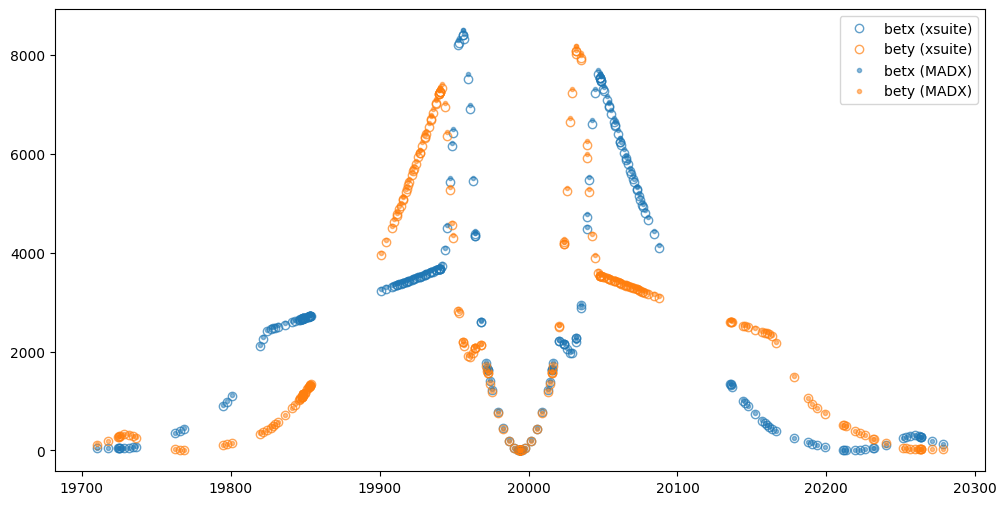

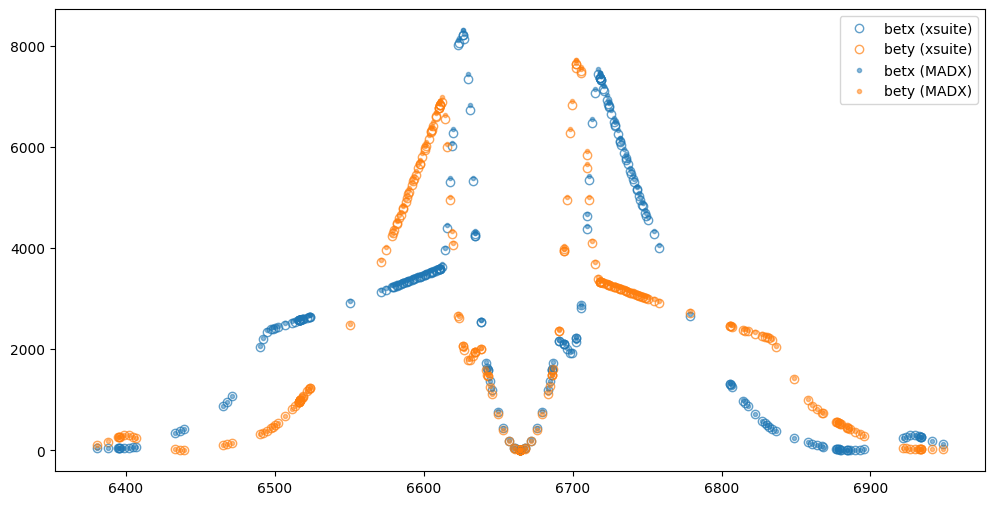

In [7]:

chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b1'
    ROI_twiss    =    twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()
    ROI_madtwiss = madtwiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    
    plt.figure(figsize=(12,6))
    plt.plot(ROI_twiss.s,ROI_twiss.betx,'o',mfc='none',color='C0',alpha=0.7,label = 'betx (xsuite)')
    plt.plot(ROI_twiss.s,ROI_twiss.bety,'o',mfc='none',color='C1',alpha=0.7,label = 'bety (xsuite)')
    plt.plot(ROI_madtwiss.s,ROI_madtwiss.betx,'.',color='C0',alpha=0.5,label = 'betx (MADX)')
    plt.plot(ROI_madtwiss.s,ROI_madtwiss.bety,'.',color='C1',alpha=0.5,label = 'bety (MADX)')

    plt.legend()


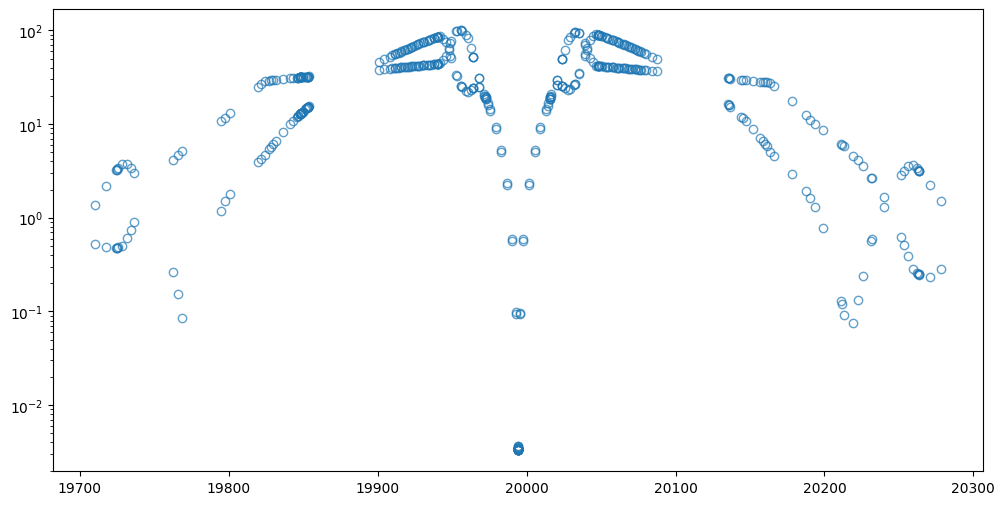

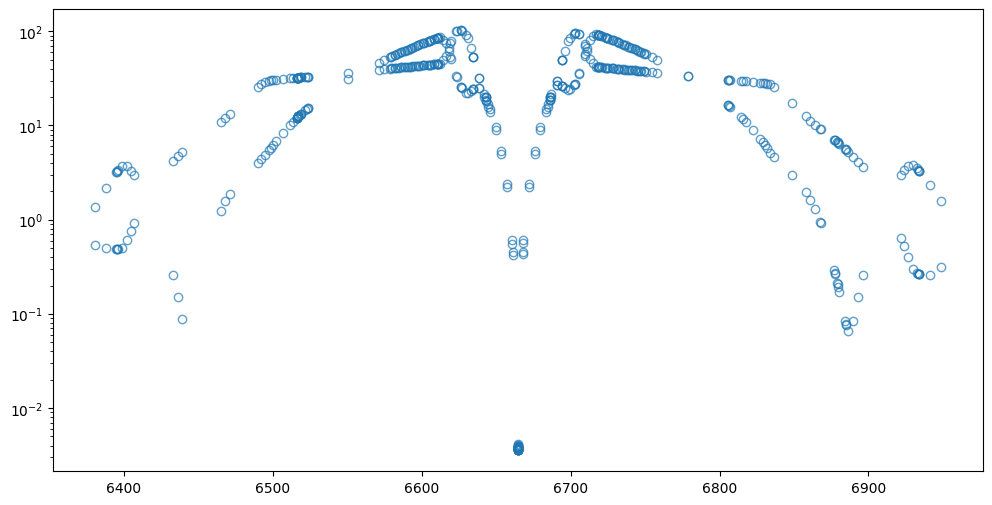

In [13]:

chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b1'
    ROI_twiss    =    twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()
    ROI_madtwiss = madtwiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    diffx = (ROI_twiss.betx-ROI_madtwiss.betx).dropna()
    diffy = (ROI_twiss.bety-ROI_madtwiss.bety).dropna()
    
    plt.figure(figsize=(12,6))
    plt.plot(ROI_twiss.loc[diffx.index,'s'],np.abs(diffx),'o',mfc='none',color='C0',alpha=0.7)
    plt.plot(ROI_twiss.loc[diffy.index,'s'],np.abs(diffy),'o',mfc='none',color='C0',alpha=0.7)
    plt.yscale('log')

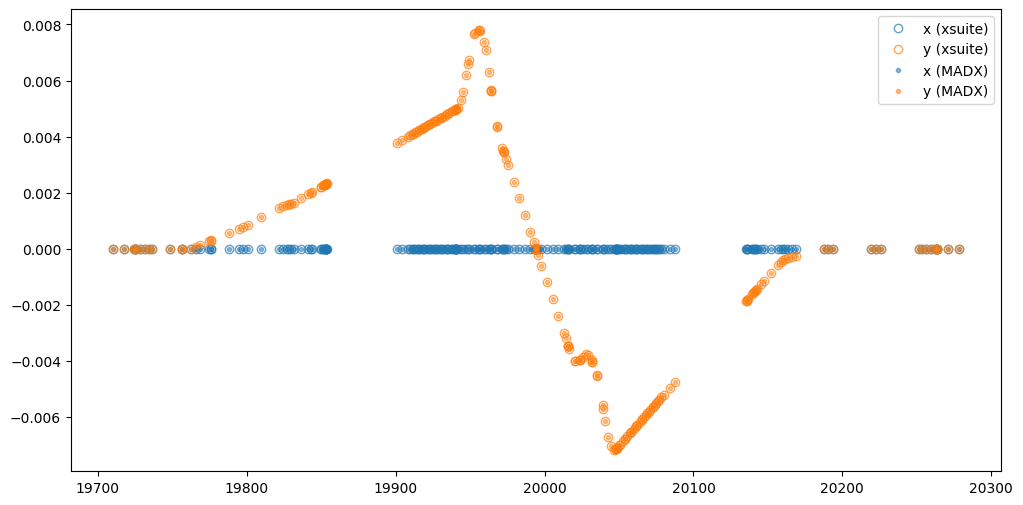

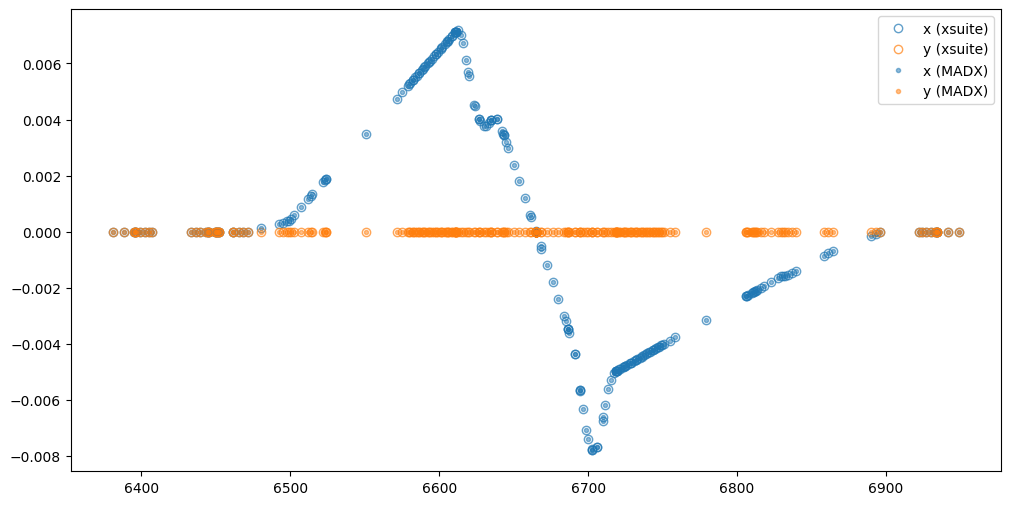

In [14]:

chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b2'
    ROI_twiss    =    twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()
    ROI_madtwiss = madtwiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    
    plt.figure(figsize=(12,6))
    plt.plot(ROI_twiss.s,ROI_twiss.x,'o',mfc='none',color='C0',alpha=0.7,label = 'x (xsuite)')
    plt.plot(ROI_twiss.s,ROI_twiss.y,'o',mfc='none',color='C1',alpha=0.7,label = 'y (xsuite)')
    plt.plot(ROI_madtwiss.s,ROI_madtwiss.x,'.',color='C0',alpha=0.5,label = 'x (MADX)')
    plt.plot(ROI_madtwiss.s,ROI_madtwiss.y,'.',color='C1',alpha=0.5,label = 'y (MADX)')

    plt.legend()


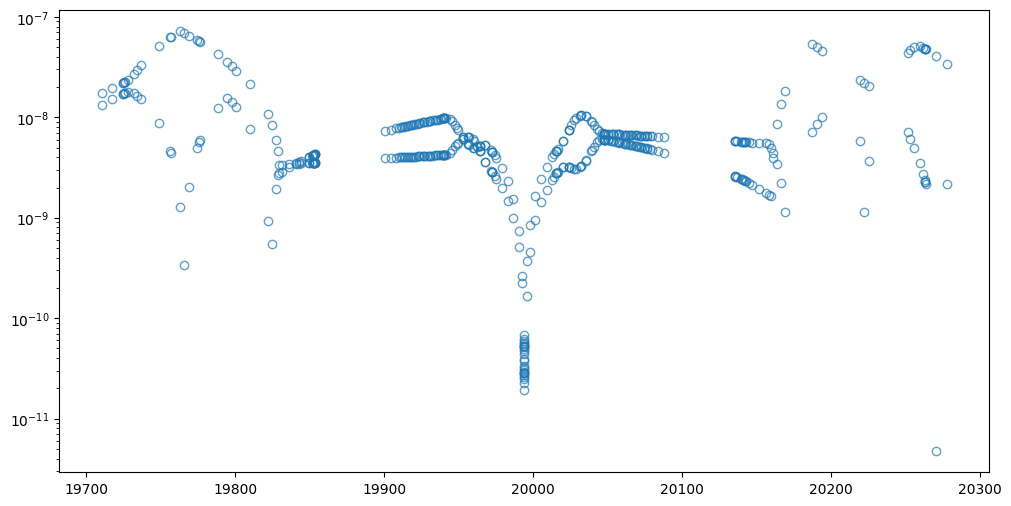

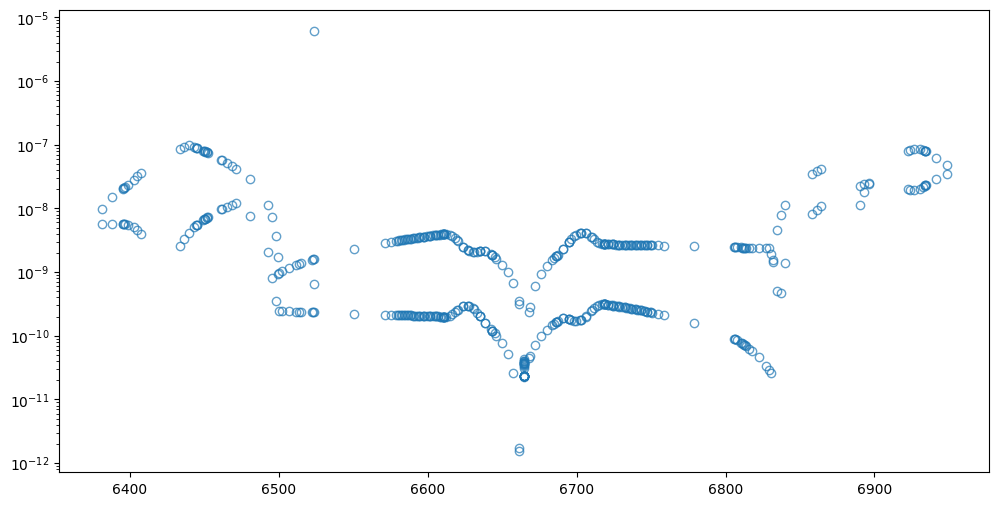

In [15]:

chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    beam='b2'
    ROI_twiss    =    twiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()
    ROI_madtwiss = madtwiss[beam].loc[f'mb.a8l{_IP[-1]}.{beam}_den':f'mb.a8r{_IP[-1]}.{beam}_dex'].copy()


    # Plotting
    diffx = (ROI_twiss.x-ROI_madtwiss.x).dropna()
    diffy = (ROI_twiss.y-ROI_madtwiss.y).dropna()
    
    plt.figure(figsize=(12,6))
    plt.plot(ROI_twiss.loc[diffx.index,'s'],np.abs(diffx),'o',mfc='none',color='C0',alpha=0.7)
    plt.plot(ROI_twiss.loc[diffy.index,'s'],np.abs(diffy),'o',mfc='none',color='C0',alpha=0.7)
    plt.yscale('log')